### Advanced Regression Assignment (Housing)
##### by Sivaprasad M

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Approach for the assignment

- Data Preparation and Understanding
- Exploratory data analysis
- One hot Encoding (Dummy Variables)
- Preparing data for modeling
- Training the model
- RFE - Recursive feature Elimination
- Residual Analysis
- Prediction and Analysis of Test Data
- Lasso
- Regularization

### Importing all the necessary libraries

In [1]:
#install it 
# pip install category_encoders

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce

### 1. Understanding the dataset

In [3]:
# Load data from csv
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.shape

(1460, 81)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [7]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:

100*house.isnull().mean()

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

The Following has significant percentage of null values

- Alley            93.767123
- MasVnrType       59.726027
- PoolQC           99.520548
- Fence            80.753425
- MiscFeature      96.301370

In [9]:
#Drop columns with maximum missing values
house = house.drop(columns=['Alley','PoolQC','Fence', 'MiscFeature'])

In [10]:
#check Missing values of columns
house.isnull().sum()[house.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [11]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house.FireplaceQu = house.FireplaceQu.fillna('NA')

In [12]:
#check missing values again
house.isnull().sum()[house.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [13]:
#check unique values of LotFrontage
house.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [14]:
#LotFrontage has a lot of null values
house.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [15]:
#check median of LotFrontage
LotFrontage_median = house.LotFrontage.median()
LotFrontage_median

69.0

In [16]:
#Imputing with the median values for all the null values for LotFrontage

house.LotFrontage = house.LotFrontage.fillna(LotFrontage_median)

In [17]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house.MasVnrArea = house.MasVnrArea.fillna(house.MasVnrArea.median())  

In [18]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house.MasVnrType = house.MasVnrType.fillna('None')

In [19]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house.BsmtQual = house.BsmtQual.fillna('NA')

In [20]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house.BsmtCond = house.BsmtCond.fillna('NA')

In [21]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house.BsmtExposure = house.BsmtExposure.fillna('No')

#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house.BsmtFinType1 = house.BsmtFinType1.fillna('NA')

#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house.BsmtFinType2 = house.BsmtFinType2.fillna('NA')

#impute missing values of Electrical with mode due to categorical column
house.Electrical = house.Electrical.fillna(house.Electrical.mode()[0])    

#replace Nan values of GarageType with NA i.e. No Garage
house.GarageType = house.GarageType.fillna('NA')

#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house.GarageYrBlt = house.GarageYrBlt.fillna(0)

#replace Nan values of GarageFinish with NA i.e. No Garage
house.GarageFinish = house.GarageFinish.fillna('NA')

#replace Nan values of GarageQual with NA i.e. No Garage
house.GarageQual = house.GarageQual.fillna('NA')

#replace Nan values of GarageFinish with NA i.e. No Garage
house.GarageQual = house.GarageQual.fillna('NA')

#replace Nan values of GarageCond with NA i.e. No Garage
house.GarageCond = house.GarageCond.fillna('NA')

In [22]:
#check missing values again
house.isnull().sum()[house.isnull().sum()>0]

Series([], dtype: int64)

In [23]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house['HouseAge'] = house.YrSold - house.YearBuilt

In [24]:
#Drop YrSold, YearBuilt after HouseAge
house=house.drop(columns=['YrSold', 'YearBuilt'])

In [25]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house = house.astype(convert_dict)

#### Converting all Categorical variables from 1,2,3... to categorical values

In [26]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house = house.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house = house.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house = house.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house = house.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house = house.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house = house.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house = house.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [27]:
house.ExterQual.value_counts()

ExterQual
3    906
4    488
5     52
2     14
Name: count, dtype: int64

In [28]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [29]:
##Get all the categorical variables

for c in house.columns:
    if house[c].dtype == object:
        print(c)
        print(house[c].value_counts(normalize=True))

MSSubClass
MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
MSZoning
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
Utilities
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64
LotConfig
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: flo

In [30]:
#Drop all columns which have more than 80% bias data based on the previous output
house=house.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [31]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [32]:
house.shape

(1460, 55)

In [33]:
#Get all object type columns
object_columns = []
for c in house.columns:
    if house[c].dtype == object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


#### Creating Dummy variables for all the object type columns which hasn't been dropped due to any bias

In [34]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,MSSubClass_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [35]:
# create dummy variable for Zoning
MSZoningn_df = pd.get_dummies(house['MSZoning'],drop_first=True, prefix='MSZoning')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,MSZoningn_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [36]:
# create dummy variable for Condition1
LotShape_df = pd.get_dummies(house['LotShape'],drop_first=True, prefix='LotShape')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,LotShape_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [37]:
# create dummy variable for Condition1
LotConfig_df = pd.get_dummies(house['LotConfig'],drop_first=True, prefix='LotConfig')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,LotConfig_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [38]:
# create dummy variable for Condition1
Neighborhood_df = pd.get_dummies(house['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,Neighborhood_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [39]:
# create dummy variable for Condition1
HouseStyle_df = pd.get_dummies(house['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,HouseStyle_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False

In [40]:
# create dummy variable for Condition1
RoofStyle_df = pd.get_dummies(house['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,RoofStyle_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PCon

In [41]:
# create dummy variable for Condition1
Exterior1st_df = pd.get_dummies(house['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,Exterior1st_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,

In [42]:
# create dummy variable for Condition1
Exterior2nd_df = pd.get_dummies(house['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,Exterior2nd_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,Fal

In [43]:
# create dummy variable for Condition1
MasVnrType_df = pd.get_dummies(house['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,MasVnrType_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False

In [44]:
# create dummy variable for Condition1
Foundation_df = pd.get_dummies(house['Foundation'],drop_first=True, prefix='Foundation')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,Foundation_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkF

In [45]:
# create dummy variable for Condition1
GarageType_df = pd.get_dummies(house['GarageType'],drop_first=True, prefix='GarageType')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,GarageType_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Fa

In [46]:
# create dummy variable for Condition1
GarageFinish_df = pd.get_dummies(house['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat MSSubClass_df with main house_data df
house = pd.concat([house,GarageFinish_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,

In [47]:
house.shape

(1460, 162)

In [48]:
#Drop categorical variables after ceating dummy varaibles
house=house.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [49]:
house.shape

(1460, 149)

## Preparing Data For Modeling

In [50]:
df_train,df_test = train_test_split(house,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [51]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,6.093046,5.580803,1984.984329,104.489716,3.399608,3.479922,1.691479,3.593536,448.165524,50.087169,563.745348,1061.998041,4.150833,1168.611166,343.540646,5.999021,1518.150833,0.439765,0.059745,1.567091,0.377081,2.856024,1.053869,3.511263,6.504407,0.598433,1.798237,1868.316357,1.771792,471.995103,92.641528,47.035260,23.241920,3.940255,14.047013,2.149853,48.711068,6.288932,180609.596474,36.497551
std,22.090553,10308.062725,1.399636,1.092121,20.604962,187.341089,0.571342,0.900348,1.058956,2.114914,465.115135,170.847470,448.739203,459.098042,0.974565,397.896911,435.498994,48.207914,531.849898,0.525381,0.241230,0.551872,0.500807,0.819993,0.230169,0.659114,1.605514,0.645769,1.825859,455.160037,0.746119,212.213075,124.479090,66.195468,63.167621,32.333667,51.081766,34.524133,578.364428,2.748576,79099.444132,30.346064
min,21.000000,1477.000000,1.000000,1.000000,1950.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
25%,60.000000,7449.000000,5.000000,5.000000,1967.000000,0.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,216.000000,793.000000,3.000000,876.000000,0.000000,0.000000,1135.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1958.000000,1.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,129500.000000,8.000000
50%,69.000000,9505.000000,6.000000,5.000000,1994.000000,0.000000,3.000000,4.000000,1.000000,4.000000,392.000000,0.000000,462.000000,994.000000,5.000000,1086.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,1978.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,161000.000000,34.000000
75%,78.000000,11512.000000,7.000000,6.000000,2004.000000,158.000000,4.000000,4.000000,3.000000,6.000000,712.000000,0.000000,806.000000,1314.000000,5.000000,1422.000000,728.000000,0.000000,1774.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,1.000000,4.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,215000.000000,54.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5.000000,5.000000,4.000000,6.000000,5644.000000,1474.000000,2336.000000,6110.000000,5.000000,4692.000000,2065.000000,515.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,5.000000,14.000000,3.000000,5.000000,2010.000000,4.000000,1418.000000,857.000000,523.000000,552.000000,508.000000,374.000000,648.000000,15500.000000,12.000000,755000.000000,136.000000


In [52]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,Fals

In [53]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03
mean,-1.043892e-17,-7.655211e-17,-2.696722e-16,1.539741e-16,-8.420732e-16,-6.611318e-17,1.243972e-16,1.287467e-16,6.263354e-17,8.612112e-17,-6.437336e-17,-1.870307e-17,-1.304865e-17,1.879006e-16,-3.270863e-16,0.000000,-6.350345e-17,-1.130883e-17,-5.915390e-17,4.871498e-17,-5.219462e-18,6.611318e-17,4.784507e-17,-3.479641e-18,3.862402e-16,3.070783e-16,-2.392253e-16,9.395031e-17,-2.435749e-17,2.296563e-16,7.481229e-17,-9.569013e-17,-4.523534e-17,-7.133264e-17,5.306453e-17,-2.087785e-17,-3.479641e-18,0.000000,-1.391856e-17,5.567426e-17,180609.596474,-9.742995e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,79099.444132,1.000490e+00
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,-9.640305e-01,-2.933126e-01,-1.256903e+00,-2.314361e+00,-3.234651e+00,-2.003035,-7.892303e-01,-1.245016e-01,-2.031927e+00,-8.374505e-01,-2.477915e-01,-2.840982e+00,-7.533165e-01,-3.484694e+00,-2.341549e-01,-2.293993e+00,-2.183802e+00,-9.271528e-01,-9.853544e-01,-4.106758e+00,-2.375841e+00,-2.225247e+00,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.925187e+00,34900.000000,-1.203301e+00
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,-9.640305e-01,-2.933126e-01,-7.753184e-01,-5.862144e-01,-1.181447e+00,-0.735755,-7.892303e-01,-1.245016e-01,-7.207646e-01,-8.374505e-01,-2.477915e-01,-1.028080e+00,-7.533165e-01,-1.044452e+00,-2.341549e-01,-7.760625e-01,-9.374844e-01,-9.271528e-01,-9.853544e-01,1.971342e-01,-1.034916e+00,-6.694436e-01,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-8.331783e-01,129500.000000,-9.395458e-01
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,-1.208154e-01,-2.933126e-01,-2.268472e-01,-1.481848e-01,8.717571e-01,-0.207721,-7.892303e-01,-1.245016e-01,-9.810360e-02,-8.374505e-01,-2.477915e-01,7.848212e-01,-7.533165e-01,1.756687e-01,-2.341549e-01,-7.760625e-01,-3.143258e-01,6.221483e-01,1.105572e-01,2.410963e-01,3.060094e-01,3.773952e-02,-7.445984e-01,-3.179307e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.051723e-01,161000.000000,-8.234265e-02
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,5.6752

### Training the Model

In [54]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [55]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

## RFE - Recursive Feature Elimination

In [56]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 49),
 ('LotArea', False, 80),
 ('OverallQual', True, 1),
 ('OverallCond', False, 10),
 ('YearRemodAdd', False, 100),
 ('MasVnrArea', False, 59),
 ('ExterQual', False, 15),
 ('BsmtQual', False, 91),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 47),
 ('BsmtFinSF1', False, 16),
 ('BsmtFinSF2', False, 21),
 ('BsmtUnfSF', False, 17),
 ('TotalBsmtSF', False, 20),
 ('HeatingQC', False, 112),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 19),
 ('GrLivArea', False, 8),
 ('BsmtFullBath', False, 11),
 ('BsmtHalfBath', False, 78),
 ('FullBath', False, 85),
 ('HalfBath', False, 76),
 ('BedroomAbvGr', False, 101),
 ('KitchenAbvGr', False, 40),
 ('KitchenQual', False, 3),
 ('TotRmsAbvGrd', False, 88),
 ('Fireplaces', False, 111),
 ('FireplaceQu', False, 106),
 ('GarageYrBlt', False, 46),
 ('GarageCars', True, 1),
 ('GarageArea', False, 70),
 ('WoodDeckSF', False, 71),
 ('OpenPorchSF', False, 107),
 ('EnclosedPorch', False, 99),
 ('3SsnPorch',

In [58]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'HouseAge', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'GarageFinish_NA'], dtype='object')

In [59]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=113)

### Building Model using STATS Model

In [60]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [61]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [62]:
X_train_rfe = X_train_rfe.astype(float)  # Convert all columns to float64
X_train = X_train.astype(float)  # Convert all columns to float64

In [63]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [64]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     145.2
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:05:49   Log-Likelihood:                -12048.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     986   BIC:                         2.434e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.729e+05   5182.247     33.373      0.000    1.63e+05    1.83e+05
OverallQual           2.329e+04   1808.610     12.875      0.000    1.97e+04    2.68e+04
BsmtExposure          1.161e+04   1236.546      9.387      0.000    9180.512     1.4e+04
1stFlrSF              2.131e+04   1573.271     13.545      0.000    1.82e+04    2.44e+04
2ndFlrSF              2.775e+04   2054.560     13.505      0.000    2.37e+04    3.18e+04
GarageCars             1.05e+04   1724.445      6.091      0.000    7119.243    1.39e+04
HouseAge             -1.106e+04   1716.933     -6.444      0.000   -1.44e+04   -7695.440
MSSubClass_45         1.388e+04   1.08e+04      1.285      0.199   -7316.025    3.51e+04
MSSubClass_50          1.13e+04   4129.996      2.735      0.006    3190.427    1.94e+04
MSSubClass_90        -3.054e+04   5648.804     -5.406      0.000   -4.16e+04   -1.95e+04
MSSubClass_120       -2.727e+04   4928.649     -5.533      0.000   -3.69e+04   -1.76e+04
MSSubClass_160       -3.118e+04   7093.650     -4.395      0.000   -4.51e+04   -1.73e+04
MSZoning_RL          -1.008e+04   4749.085     -2.122      0.034   -1.94e+04    -757.052
MSZoning_RM          -1.435e+04   5458.588     -2.628      0.009   -2.51e+04   -3634.070
LotShape_IR3         -2.766e+04   1.12e+04     -2.460      0.014   -4.97e+04   -5596.556
Neighborhood_Blueste    1.9e+04   3.36e+04      0.566      0.572   -4.69e+04    8.49e+04
Neighborhood_BrDale   1.241e+04   1.18e+04      1.048      0.295   -1.08e+04    3.56e+04
Neighborhood_ClearCr  1.792e+04   7694.773      2.328      0.020    2815.794     3.3e+04
Neighborhood_Crawfor  3.538e+04   6338.459      5.582      0.000    2.29e+04    4.78e+04
Neighborhood_NoRidge  5.562e+04   6408.527      8.680      0.000     4.3e+04    6.82e+04
Neighborhood_NridgHt  4.972e+04   5123.283      9.705      0.000    3.97e+04    5.98e+04
Neighborhood_StoneBr  3.597e+04   9921.710      3.625      0.000    1.65e+04    5.54e+04
HouseStyle_1Story     2.541e+04   4202.406      6.048      0.000    1.72e+04    3.37e+04
RoofStyle_Gambrel       1.4e+04   1.93e+04      0.726      0.468   -2.38e+04    5.18e+04
Exterior1st_AsphShn  -1.143e+04   1.68e+04     -0.682      0.495   -4.43e+04    2.15e+04
Exterior1st_BrkComm  -6.391e+04   3.08e+04     -2.074      0.038   -1.24e+05   -3431.635
Exterior1st_BrkFace   1.026e+04   9057.377      1.132      0.258   -7518.851     2.8e+04
Exterior1st_ImStucc  -6.195e+04   3.58e+04     -1.731      0.084   -1.32e+05    8264.513
Exterior1st_Stone    -9172.3972   2.37e+04     -0.386      0.699   -5.58e+04    3.74e+04
Exterior1st_Stucco   -1.293e+04   7757.436     -1.667      0.096   -2.82e+04    2293.156
Exterior2nd_AsphShn  -1.143e+04   1.68e+04     -0.682      0.495   -4.43e+04    2.15e+04
Exterior2nd_Brk Cmn    2.43e+04   2.02e+04      1.203    

In [65]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
30,Exterior2nd_AsphShn,inf
24,Exterior1st_AsphShn,inf
0,const,25.44
22,HouseStyle_1Story,4.18
4,2ndFlrSF,4.00
13,MSZoning_RM,3.62
12,MSZoning_RL,3.60
1,OverallQual,3.10
5,GarageCars,2.82
6,HouseAge,2.79


___Exterior1st_Stone has higher p-value. Lets drop it.___


In [66]:
X_train_new = X_train_rfe.drop(['Exterior1st_Stone'],axis=1)

In [67]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'HouseAge', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'GarageFinish_NA'], dtype='object')

In [68]:
X_train_lm = sm.add_constant(X_train_new)

In [69]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [70]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:13:08   Log-Likelihood:                -12048.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     987   BIC:                         2.433e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.729e+05   5179.100     33.386      0.000    1.63e+05    1.83e+05
OverallQual            2.33e+04   1807.531     12.890      0.000    1.98e+04    2.68e+04
BsmtExposure          1.162e+04   1235.833      9.399      0.000    9190.054     1.4e+04
1stFlrSF              2.122e+04   1556.642     13.634      0.000    1.82e+04    2.43e+04
2ndFlrSF              2.775e+04   2053.608     13.515      0.000    2.37e+04    3.18e+04
GarageCars            1.051e+04   1723.458      6.101      0.000    7132.407    1.39e+04
HouseAge             -1.106e+04   1716.189     -6.446      0.000   -1.44e+04   -7695.575
MSSubClass_45         1.391e+04   1.08e+04      1.289      0.198   -7274.242    3.51e+04
MSSubClass_50         1.132e+04   4127.829      2.742      0.006    3216.519    1.94e+04
MSSubClass_90        -3.047e+04   5643.402     -5.398      0.000   -4.15e+04   -1.94e+04
MSSubClass_120       -2.724e+04   4925.802     -5.529      0.000   -3.69e+04   -1.76e+04
MSSubClass_160       -3.125e+04   7088.350     -4.408      0.000   -4.52e+04   -1.73e+04
MSZoning_RL          -1.008e+04   4747.038     -2.123      0.034   -1.94e+04    -760.890
MSZoning_RM          -1.437e+04   5455.823     -2.634      0.009   -2.51e+04   -3665.425
LotShape_IR3         -2.756e+04   1.12e+04     -2.453      0.014   -4.96e+04   -5517.264
Neighborhood_Blueste  1.903e+04   3.36e+04      0.567      0.571   -4.68e+04    8.49e+04
Neighborhood_BrDale   1.241e+04   1.18e+04      1.049      0.295   -1.08e+04    3.56e+04
Neighborhood_ClearCr  1.796e+04   7690.588      2.335      0.020    2868.716    3.31e+04
Neighborhood_Crawfor  3.511e+04   6295.924      5.576      0.000    2.28e+04    4.75e+04
Neighborhood_NoRidge   5.57e+04   6403.013      8.699      0.000    4.31e+04    6.83e+04
Neighborhood_NridgHt  4.978e+04   5118.424      9.726      0.000    3.97e+04    5.98e+04
Neighborhood_StoneBr  3.599e+04   9917.235      3.629      0.000    1.65e+04    5.55e+04
HouseStyle_1Story     2.544e+04   4200.218      6.056      0.000    1.72e+04    3.37e+04
RoofStyle_Gambrel     1.411e+04   1.93e+04      0.732      0.464   -2.37e+04    5.19e+04
Exterior1st_AsphShn  -1.138e+04   1.68e+04     -0.679      0.497   -4.43e+04    2.15e+04
Exterior1st_BrkComm  -6.391e+04   3.08e+04     -2.075      0.038   -1.24e+05   -3455.812
Exterior1st_BrkFace   1.041e+04   9045.040      1.150      0.250   -7343.604    2.82e+04
Exterior1st_ImStucc  -6.196e+04   3.58e+04     -1.733      0.083   -1.32e+05    8218.719
Exterior1st_Stucco   -1.285e+04   7751.212     -1.658      0.098   -2.81e+04    2362.623
Exterior2nd_AsphShn  -1.138e+04   1.68e+04     -0.679      0.497   -4.43e+04    2.15e+04
Exterior2nd_Brk Cmn   2.434e+04   2.02e+04      1.205      0.229   -1.53e+04     6.4e+04
Exterior2nd_BrkFace   2.197e+04   1.22e+04      1.803    

In [71]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
30,Exterior2nd_AsphShn,inf
24,Exterior1st_AsphShn,inf
0,const,25.44
22,HouseStyle_1Story,4.18
4,2ndFlrSF,4.00
13,MSZoning_RM,3.62
12,MSZoning_RL,3.60
1,OverallQual,3.10
5,GarageCars,2.82
6,HouseAge,2.79


___Neighborhood_Blueste has higher p-value. Lets drop it.___

In [72]:

X_train_new = X_train_new.drop(['Neighborhood_Blueste'],axis=1)

In [73]:
X_train_lm = sm.add_constant(X_train_new)

In [74]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [75]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     154.5
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:14:44   Log-Likelihood:                -12049.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     988   BIC:                         2.433e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.727e+05   5162.955     33.448      0.000    1.63e+05    1.83e+05
OverallQual           2.329e+04   1806.836     12.890      0.000    1.97e+04    2.68e+04
BsmtExposure          1.162e+04   1235.396      9.405      0.000    9194.109     1.4e+04
1stFlrSF              2.123e+04   1556.044     13.644      0.000    1.82e+04    2.43e+04
2ndFlrSF              2.778e+04   2052.214     13.539      0.000    2.38e+04    3.18e+04
GarageCars            1.053e+04   1722.688      6.112      0.000    7147.950    1.39e+04
HouseAge             -1.107e+04   1715.553     -6.453      0.000   -1.44e+04   -7703.970
MSSubClass_45         1.393e+04   1.08e+04      1.290      0.197   -7253.926    3.51e+04
MSSubClass_50         1.131e+04   4126.394      2.741      0.006    3212.610    1.94e+04
MSSubClass_90        -3.049e+04   5641.340     -5.404      0.000   -4.16e+04   -1.94e+04
MSSubClass_120       -2.723e+04   4924.106     -5.531      0.000   -3.69e+04   -1.76e+04
MSSubClass_160       -3.053e+04   6972.863     -4.379      0.000   -4.42e+04   -1.69e+04
MSZoning_RL          -9879.9645   4732.757     -2.088      0.037   -1.92e+04    -592.554
MSZoning_RM          -1.405e+04   5425.103     -2.591      0.010   -2.47e+04   -3408.034
LotShape_IR3          -2.76e+04   1.12e+04     -2.458      0.014   -4.96e+04   -5563.967
Neighborhood_BrDale   1.162e+04   1.17e+04      0.989      0.323   -1.14e+04    3.47e+04
Neighborhood_ClearCr  1.795e+04   7687.934      2.335      0.020    2866.328     3.3e+04
Neighborhood_Crawfor  3.512e+04   6293.736      5.580      0.000    2.28e+04    4.75e+04
Neighborhood_NoRidge  5.565e+04   6400.275      8.695      0.000    4.31e+04    6.82e+04
Neighborhood_NridgHt  4.972e+04   5115.518      9.720      0.000    3.97e+04    5.98e+04
Neighborhood_StoneBr  3.593e+04   9913.293      3.625      0.000    1.65e+04    5.54e+04
HouseStyle_1Story     2.549e+04   4197.894      6.071      0.000    1.72e+04    3.37e+04
RoofStyle_Gambrel     1.408e+04   1.93e+04      0.731      0.465   -2.37e+04    5.19e+04
Exterior1st_AsphShn  -1.138e+04   1.67e+04     -0.679      0.497   -4.42e+04    2.15e+04
Exterior1st_BrkComm  -6.321e+04   3.08e+04     -2.054      0.040   -1.24e+05   -2822.298
Exterior1st_BrkFace   1.039e+04   9041.879      1.149      0.251   -7355.220    2.81e+04
Exterior1st_ImStucc  -6.194e+04   3.58e+04     -1.732      0.084   -1.32e+05    8219.110
Exterior1st_Stucco   -1.288e+04   7748.350     -1.662      0.097   -2.81e+04    2325.468
Exterior2nd_AsphShn  -1.138e+04   1.67e+04     -0.679      0.497   -4.42e+04    2.15e+04
Exterior2nd_Brk Cmn   2.363e+04   2.02e+04      1.172      0.241   -1.59e+04    6.32e+04
Exterior2nd_BrkFace   2.198e+04   1.22e+04      1.805      0.071   -1915.581    4.59e+04
Exterior2nd_CmentBd   1.164e+04   5798.896      2.008    

___RoofStyle_Gambrel has higher p-value. Lets drop it.___

In [76]:
X_train_new = X_train_new.drop(['RoofStyle_Gambrel'],axis=1)

In [77]:
X_train_lm = sm.add_constant(X_train_new)

In [78]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [79]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     159.5
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:15:20   Log-Likelihood:                -12049.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     989   BIC:                         2.432e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.727e+05   5161.586     33.452      0.000    1.63e+05    1.83e+05
OverallQual           2.323e+04   1804.824     12.874      0.000    1.97e+04    2.68e+04
BsmtExposure          1.162e+04   1235.099      9.409      0.000    9197.673     1.4e+04
1stFlrSF              2.127e+04   1554.774     13.680      0.000    1.82e+04    2.43e+04
2ndFlrSF              2.785e+04   2049.784     13.587      0.000    2.38e+04    3.19e+04
GarageCars             1.05e+04   1721.903      6.099      0.000    7123.007    1.39e+04
HouseAge             -1.107e+04   1715.150     -6.454      0.000   -1.44e+04   -7704.657
MSSubClass_45         1.389e+04   1.08e+04      1.287      0.198   -7290.040    3.51e+04
MSSubClass_50         1.151e+04   4116.788      2.795      0.005    3426.672    1.96e+04
MSSubClass_90        -3.059e+04   5638.398     -5.425      0.000   -4.17e+04   -1.95e+04
MSSubClass_120        -2.72e+04   4922.777     -5.526      0.000   -3.69e+04   -1.75e+04
MSSubClass_160       -3.052e+04   6971.188     -4.378      0.000   -4.42e+04   -1.68e+04
MSZoning_RL          -9854.0327   4731.511     -2.083      0.038   -1.91e+04    -569.078
MSZoning_RM          -1.401e+04   5423.545     -2.584      0.010   -2.47e+04   -3370.626
LotShape_IR3         -2.762e+04   1.12e+04     -2.460      0.014   -4.97e+04   -5590.207
Neighborhood_BrDale   1.159e+04   1.17e+04      0.986      0.324   -1.15e+04    3.46e+04
Neighborhood_ClearCr  1.788e+04   7685.536      2.327      0.020    2801.305     3.3e+04
Neighborhood_Crawfor  3.553e+04   6267.243      5.669      0.000    2.32e+04    4.78e+04
Neighborhood_NoRidge   5.56e+04   6398.477      8.690      0.000     4.3e+04    6.82e+04
Neighborhood_NridgHt  4.979e+04   5113.598      9.736      0.000    3.98e+04    5.98e+04
Neighborhood_StoneBr    3.6e+04   9910.594      3.632      0.000    1.65e+04    5.54e+04
HouseStyle_1Story     2.551e+04   4196.799      6.078      0.000    1.73e+04    3.37e+04
Exterior1st_AsphShn  -1.147e+04   1.67e+04     -0.685      0.494   -4.43e+04    2.14e+04
Exterior1st_BrkComm  -6.325e+04   3.08e+04     -2.056      0.040   -1.24e+05   -2875.964
Exterior1st_BrkFace   1.027e+04   9038.338      1.136      0.256   -7465.267     2.8e+04
Exterior1st_ImStucc  -6.179e+04   3.57e+04     -1.729      0.084   -1.32e+05    8352.309
Exterior1st_Stucco   -1.303e+04   7743.933     -1.682      0.093   -2.82e+04    2170.056
Exterior2nd_AsphShn  -1.147e+04   1.67e+04     -0.685      0.494   -4.43e+04    2.14e+04
Exterior2nd_Brk Cmn   2.362e+04   2.01e+04      1.172      0.241   -1.59e+04    6.32e+04
Exterior2nd_BrkFace   2.209e+04   1.22e+04      1.815      0.070   -1794.742     4.6e+04
Exterior2nd_CmentBd   1.158e+04   5796.929      1.998      0.046     205.303     2.3e+04
Exterior2nd_ImStucc   2.717e+04   1.27e+04      2.145    

___Exterior1st_AsphShn has higher p-value. Lets drop it.___

In [80]:

X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

In [81]:
X_train_lm = sm.add_constant(X_train_new)


In [82]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [83]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     159.5
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:16:33   Log-Likelihood:                -12049.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     989   BIC:                         2.432e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.727e+05   5161.586     33.452      0.000    1.63e+05    1.83e+05
OverallQual           2.323e+04   1804.824     12.874      0.000    1.97e+04    2.68e+04
BsmtExposure          1.162e+04   1235.099      9.409      0.000    9197.673     1.4e+04
1stFlrSF              2.127e+04   1554.774     13.680      0.000    1.82e+04    2.43e+04
2ndFlrSF              2.785e+04   2049.784     13.587      0.000    2.38e+04    3.19e+04
GarageCars             1.05e+04   1721.903      6.099      0.000    7123.007    1.39e+04
HouseAge             -1.107e+04   1715.150     -6.454      0.000   -1.44e+04   -7704.657
MSSubClass_45         1.389e+04   1.08e+04      1.287      0.198   -7290.040    3.51e+04
MSSubClass_50         1.151e+04   4116.788      2.795      0.005    3426.672    1.96e+04
MSSubClass_90        -3.059e+04   5638.398     -5.425      0.000   -4.17e+04   -1.95e+04
MSSubClass_120        -2.72e+04   4922.777     -5.526      0.000   -3.69e+04   -1.75e+04
MSSubClass_160       -3.052e+04   6971.188     -4.378      0.000   -4.42e+04   -1.68e+04
MSZoning_RL          -9854.0327   4731.511     -2.083      0.038   -1.91e+04    -569.078
MSZoning_RM          -1.401e+04   5423.545     -2.584      0.010   -2.47e+04   -3370.626
LotShape_IR3         -2.762e+04   1.12e+04     -2.460      0.014   -4.97e+04   -5590.207
Neighborhood_BrDale   1.159e+04   1.17e+04      0.986      0.324   -1.15e+04    3.46e+04
Neighborhood_ClearCr  1.788e+04   7685.536      2.327      0.020    2801.305     3.3e+04
Neighborhood_Crawfor  3.553e+04   6267.243      5.669      0.000    2.32e+04    4.78e+04
Neighborhood_NoRidge   5.56e+04   6398.477      8.690      0.000     4.3e+04    6.82e+04
Neighborhood_NridgHt  4.979e+04   5113.598      9.736      0.000    3.98e+04    5.98e+04
Neighborhood_StoneBr    3.6e+04   9910.594      3.632      0.000    1.65e+04    5.54e+04
HouseStyle_1Story     2.551e+04   4196.799      6.078      0.000    1.73e+04    3.37e+04
Exterior1st_BrkComm  -6.325e+04   3.08e+04     -2.056      0.040   -1.24e+05   -2875.964
Exterior1st_BrkFace   1.027e+04   9038.338      1.136      0.256   -7465.267     2.8e+04
Exterior1st_ImStucc  -6.179e+04   3.57e+04     -1.729      0.084   -1.32e+05    8352.309
Exterior1st_Stucco   -1.303e+04   7743.933     -1.682      0.093   -2.82e+04    2170.056
Exterior2nd_AsphShn  -2.293e+04   3.35e+04     -0.685      0.494   -8.86e+04    4.28e+04
Exterior2nd_Brk Cmn   2.362e+04   2.01e+04      1.172      0.241   -1.59e+04    6.32e+04
Exterior2nd_BrkFace   2.209e+04   1.22e+04      1.815      0.070   -1794.742     4.6e+04
Exterior2nd_CmentBd   1.158e+04   5796.929      1.998      0.046     205.303     2.3e+04
Exterior2nd_ImStucc   2.717e+04   1.27e+04      2.145      0.032    2315.848     5.2e+04
GarageFinish_NA       1.449e+04   5927.191      2.444    

___Exterior2nd_AsphShn	 has higher p-value. Lets drop it.___

In [84]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

In [85]:
X_train_lm = sm.add_constant(X_train_new)


In [86]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [87]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.9
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:17:52   Log-Likelihood:                -12049.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     990   BIC:                         2.431e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.727e+05   5159.545     33.476      0.000    1.63e+05    1.83e+05
OverallQual            2.32e+04   1803.754     12.864      0.000    1.97e+04    2.67e+04
BsmtExposure          1.165e+04   1234.163      9.438      0.000    9225.979    1.41e+04
1stFlrSF              2.123e+04   1553.244     13.668      0.000    1.82e+04    2.43e+04
2ndFlrSF              2.785e+04   2049.224     13.592      0.000    2.38e+04    3.19e+04
GarageCars            1.054e+04   1720.440      6.128      0.000    7166.081    1.39e+04
HouseAge             -1.106e+04   1714.665     -6.453      0.000   -1.44e+04   -7699.319
MSSubClass_45         1.394e+04   1.08e+04      1.292      0.197   -7230.712    3.51e+04
MSSubClass_50         1.151e+04   4115.684      2.796      0.005    3429.038    1.96e+04
MSSubClass_90        -3.108e+04   5589.769     -5.561      0.000   -4.21e+04   -2.01e+04
MSSubClass_120       -2.721e+04   4921.452     -5.528      0.000   -3.69e+04   -1.75e+04
MSSubClass_160       -3.058e+04   6968.742     -4.388      0.000   -4.43e+04   -1.69e+04
MSZoning_RL          -9905.1163   4729.654     -2.094      0.036   -1.92e+04    -623.818
MSZoning_RM          -1.404e+04   5421.950     -2.590      0.010   -2.47e+04   -3400.518
LotShape_IR3         -2.762e+04   1.12e+04     -2.461      0.014   -4.96e+04   -5594.591
Neighborhood_BrDale   1.162e+04   1.17e+04      0.990      0.323   -1.14e+04    3.47e+04
Neighborhood_ClearCr  1.787e+04   7683.457      2.326      0.020    2794.342    3.29e+04
Neighborhood_Crawfor  3.554e+04   6265.522      5.673      0.000    2.32e+04    4.78e+04
Neighborhood_NoRidge  5.563e+04   6396.691      8.696      0.000    4.31e+04    6.82e+04
Neighborhood_NridgHt  4.983e+04   5111.888      9.747      0.000    3.98e+04    5.99e+04
Neighborhood_StoneBr  3.604e+04   9907.732      3.637      0.000    1.66e+04    5.55e+04
HouseStyle_1Story      2.55e+04   4195.643      6.077      0.000    1.73e+04    3.37e+04
Exterior1st_BrkComm  -6.329e+04   3.08e+04     -2.058      0.040   -1.24e+05   -2931.647
Exterior1st_BrkFace   1.033e+04   9035.551      1.143      0.253   -7404.357    2.81e+04
Exterior1st_ImStucc  -6.182e+04   3.57e+04     -1.730      0.084   -1.32e+05    8302.115
Exterior1st_Stucco   -1.296e+04   7741.252     -1.674      0.094   -2.82e+04    2230.969
Exterior2nd_Brk Cmn   2.364e+04   2.01e+04      1.174      0.241   -1.59e+04    6.32e+04
Exterior2nd_BrkFace   2.217e+04   1.22e+04      1.821      0.069   -1715.064     4.6e+04
Exterior2nd_CmentBd   1.162e+04   5795.135      2.005      0.045     244.864     2.3e+04
Exterior2nd_ImStucc   2.724e+04   1.27e+04      2.151      0.032    2388.509    5.21e+04
GarageFinish_NA       1.419e+04   5909.929      2.401      0.017    2593.322    2.58e+04
=========================================================

___Neighborhood_BrDale	 has higher p-value. Lets drop it.___

In [88]:
X_train_new = X_train_new.drop(['Neighborhood_BrDale'],axis=1)
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     170.6
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:19:28   Log-Likelihood:                -12050.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     991   BIC:                         2.431e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.718e+05   5080.843     33.819      0.000    1.62e+05    1.82e+05
OverallQual            2.33e+04   1801.218     12.934      0.000    1.98e+04    2.68e+04
BsmtExposure          1.164e+04   1234.128      9.432      0.000    9218.848    1.41e+04
1stFlrSF              2.122e+04   1553.172     13.660      0.000    1.82e+04    2.43e+04
2ndFlrSF               2.78e+04   2048.601     13.573      0.000    2.38e+04    3.18e+04
GarageCars            1.039e+04   1713.975      6.065      0.000    7031.533    1.38e+04
HouseAge             -1.107e+04   1714.620     -6.458      0.000   -1.44e+04   -7708.994
MSSubClass_45         1.365e+04   1.08e+04      1.266      0.206   -7507.914    3.48e+04
MSSubClass_50         1.132e+04   4111.326      2.753      0.006    3251.167    1.94e+04
MSSubClass_90        -3.104e+04   5589.530     -5.553      0.000    -4.2e+04   -2.01e+04
MSSubClass_120       -2.725e+04   4921.168     -5.538      0.000   -3.69e+04   -1.76e+04
MSSubClass_160       -2.726e+04   6111.126     -4.461      0.000   -3.93e+04   -1.53e+04
MSZoning_RL          -8977.5220   4635.780     -1.937      0.053   -1.81e+04     119.551
MSZoning_RM          -1.263e+04   5229.877     -2.414      0.016   -2.29e+04   -2362.249
LotShape_IR3         -2.762e+04   1.12e+04     -2.461      0.014   -4.96e+04   -5591.581
Neighborhood_ClearCr  1.787e+04   7683.375      2.326      0.020    2790.644    3.29e+04
Neighborhood_Crawfor  3.553e+04   6265.440      5.671      0.000    2.32e+04    4.78e+04
Neighborhood_NoRidge  5.569e+04   6396.315      8.706      0.000    4.31e+04    6.82e+04
Neighborhood_NridgHt  4.967e+04   5109.339      9.721      0.000    3.96e+04    5.97e+04
Neighborhood_StoneBr  3.574e+04   9902.913      3.609      0.000    1.63e+04    5.52e+04
HouseStyle_1Story     2.545e+04   4195.387      6.067      0.000    1.72e+04    3.37e+04
Exterior1st_BrkComm  -5.995e+04   3.06e+04     -1.961      0.050    -1.2e+05      43.018
Exterior1st_BrkFace   1.034e+04   9035.449      1.144      0.253   -7392.618    2.81e+04
Exterior1st_ImStucc  -6.288e+04   3.57e+04     -1.760      0.079   -1.33e+05    7210.356
Exterior1st_Stucco   -1.307e+04   7740.368     -1.689      0.092   -2.83e+04    2118.920
Exterior2nd_Brk Cmn   2.035e+04   1.99e+04      1.024      0.306   -1.86e+04    5.93e+04
Exterior2nd_BrkFace   2.209e+04   1.22e+04      1.815      0.070   -1788.329     4.6e+04
Exterior2nd_CmentBd   1.175e+04   5793.579      2.028      0.043     378.214    2.31e+04
Exterior2nd_ImStucc   2.832e+04   1.26e+04      2.244      0.025    3557.829    5.31e+04
GarageFinish_NA       1.399e+04   5906.275      2.368      0.018    2396.644    2.56e+04
==============================================================================
Omnibus:                      272.296   Durbin-Watson:             

___Exterior2nd_Brk Cmn	 has higher p-value. Lets drop it.___

In [89]:
X_train_new = X_train_new.drop(['Exterior2nd_Brk Cmn'],axis=1)
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.6
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:20:42   Log-Likelihood:                -12050.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     992   BIC:                         2.430e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.714e+05   5063.952     33.848      0.000    1.61e+05    1.81e+05
OverallQual           2.332e+04   1801.165     12.945      0.000    1.98e+04    2.69e+04
BsmtExposure          1.163e+04   1234.139      9.426      0.000    9211.626    1.41e+04
1stFlrSF              2.123e+04   1553.188     13.666      0.000    1.82e+04    2.43e+04
2ndFlrSF              2.777e+04   2048.362     13.557      0.000    2.37e+04    3.18e+04
GarageCars             1.05e+04   1710.766      6.139      0.000    7145.921    1.39e+04
HouseAge             -1.094e+04   1709.325     -6.397      0.000   -1.43e+04   -7580.918
MSSubClass_45         1.368e+04   1.08e+04      1.268      0.205   -7487.538    3.48e+04
MSSubClass_50         1.131e+04   4111.408      2.750      0.006    3237.909    1.94e+04
MSSubClass_90        -3.105e+04   5589.651     -5.556      0.000    -4.2e+04   -2.01e+04
MSSubClass_120       -2.699e+04   4914.515     -5.492      0.000   -3.66e+04   -1.73e+04
MSSubClass_160       -2.551e+04   5865.870     -4.349      0.000    -3.7e+04    -1.4e+04
MSZoning_RL          -8420.3885   4603.875     -1.829      0.068   -1.75e+04     614.063
MSZoning_RM          -1.249e+04   5228.416     -2.389      0.017   -2.28e+04   -2232.997
LotShape_IR3         -2.761e+04   1.12e+04     -2.460      0.014   -4.96e+04   -5585.968
Neighborhood_ClearCr  1.776e+04   7682.848      2.312      0.021    2684.113    3.28e+04
Neighborhood_Crawfor  3.538e+04   6263.987      5.649      0.000    2.31e+04    4.77e+04
Neighborhood_NoRidge  5.559e+04   6395.797      8.692      0.000     4.3e+04    6.81e+04
Neighborhood_NridgHt  4.943e+04   5104.333      9.685      0.000    3.94e+04    5.94e+04
Neighborhood_StoneBr  3.538e+04   9896.904      3.574      0.000     1.6e+04    5.48e+04
HouseStyle_1Story     2.537e+04   4194.775      6.049      0.000    1.71e+04    3.36e+04
Exterior1st_BrkComm  -3.969e+04   2.33e+04     -1.702      0.089   -8.54e+04    6058.605
Exterior1st_BrkFace   1.021e+04   9034.865      1.131      0.259   -7515.229    2.79e+04
Exterior1st_ImStucc  -6.273e+04   3.57e+04     -1.756      0.079   -1.33e+05    7364.271
Exterior1st_Stucco   -1.319e+04   7739.687     -1.704      0.089   -2.84e+04    1998.514
Exterior2nd_BrkFace   2.209e+04   1.22e+04      1.815      0.070   -1795.204     4.6e+04
Exterior2nd_CmentBd   1.169e+04   5793.480      2.018      0.044     324.162    2.31e+04
Exterior2nd_ImStucc   2.807e+04   1.26e+04      2.225      0.026    3316.995    5.28e+04
GarageFinish_NA       1.417e+04   5903.659      2.401      0.017    2586.800    2.58e+04
==============================================================================
Omnibus:                      272.095   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18090.46

___Exterior1st_BrkFace	 has higher p-value. Lets drop it.___

In [90]:
X_train_new = X_train_new.drop(['Exterior1st_BrkFace'],axis=1)
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     183.0
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:22:07   Log-Likelihood:                -12051.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     993   BIC:                         2.430e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.715e+05   5064.070     33.865      0.000    1.62e+05    1.81e+05
OverallQual            2.33e+04   1801.362     12.935      0.000    1.98e+04    2.68e+04
BsmtExposure          1.161e+04   1234.167      9.409      0.000    9190.182     1.4e+04
1stFlrSF               2.14e+04   1546.118     13.838      0.000    1.84e+04    2.44e+04
2ndFlrSF              2.775e+04   2048.560     13.545      0.000    2.37e+04    3.18e+04
GarageCars            1.057e+04   1710.070      6.179      0.000    7211.264    1.39e+04
HouseAge             -1.079e+04   1704.820     -6.330      0.000   -1.41e+04   -7445.895
MSSubClass_45         1.347e+04   1.08e+04      1.249      0.212   -7690.793    3.46e+04
MSSubClass_50          1.12e+04   4110.883      2.724      0.007    3131.388    1.93e+04
MSSubClass_90        -3.105e+04   5590.433     -5.554      0.000    -4.2e+04   -2.01e+04
MSSubClass_120       -2.706e+04   4914.845     -5.505      0.000   -3.67e+04   -1.74e+04
MSSubClass_160       -2.527e+04   5862.906     -4.310      0.000   -3.68e+04   -1.38e+04
MSZoning_RL          -8334.3104   4603.890     -1.810      0.071   -1.74e+04     700.160
MSZoning_RM          -1.249e+04   5229.144     -2.388      0.017   -2.27e+04   -2224.012
LotShape_IR3         -2.783e+04   1.12e+04     -2.479      0.013   -4.99e+04   -5798.649
Neighborhood_ClearCr  1.806e+04   7679.468      2.351      0.019    2986.514    3.31e+04
Neighborhood_Crawfor   3.61e+04   6232.938      5.792      0.000    2.39e+04    4.83e+04
Neighborhood_NoRidge  5.538e+04   6393.897      8.661      0.000    4.28e+04    6.79e+04
Neighborhood_NridgHt  4.922e+04   5101.573      9.648      0.000    3.92e+04    5.92e+04
Neighborhood_StoneBr  3.522e+04   9897.342      3.559      0.000    1.58e+04    5.46e+04
HouseStyle_1Story     2.539e+04   4195.329      6.053      0.000    1.72e+04    3.36e+04
Exterior1st_BrkComm  -3.997e+04   2.33e+04     -1.714      0.087   -8.57e+04    5780.433
Exterior1st_ImStucc   -6.27e+04   3.57e+04     -1.755      0.080   -1.33e+05    7404.259
Exterior1st_Stucco   -1.365e+04   7730.135     -1.766      0.078   -2.88e+04    1521.194
Exterior2nd_BrkFace   3.196e+04   8472.491      3.773      0.000    1.53e+04    4.86e+04
Exterior2nd_CmentBd   1.152e+04   5792.170      1.988      0.047     149.525    2.29e+04
Exterior2nd_ImStucc   2.787e+04   1.26e+04      2.209      0.027    3114.448    5.26e+04
GarageFinish_NA       1.416e+04   5904.474      2.398      0.017    2571.744    2.57e+04
==============================================================================
Omnibus:                      272.928   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18136.367
Skew:                          -0.144   Prob(JB):                         0.00
Kurtosis

___MSSubClass_45	 has higher p-value. Lets drop it.___

In [91]:
X_train_new = X_train_new.drop(['MSSubClass_45'],axis=1)
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:23:11   Log-Likelihood:                -12052.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     994   BIC:                         2.429e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.727e+05   4979.172     34.676      0.000    1.63e+05    1.82e+05
OverallQual           2.349e+04   1795.143     13.088      0.000       2e+04     2.7e+04
BsmtExposure           1.14e+04   1222.583      9.323      0.000    8999.081    1.38e+04
1stFlrSF              2.137e+04   1546.385     13.817      0.000    1.83e+04    2.44e+04
2ndFlrSF              2.694e+04   1944.770     13.853      0.000    2.31e+04    3.08e+04
GarageCars            1.068e+04   1708.350      6.249      0.000    7322.992     1.4e+04
HouseAge             -1.062e+04   1699.607     -6.247      0.000    -1.4e+04   -7282.242
MSSubClass_50         1.025e+04   4040.910      2.536      0.011    2317.657    1.82e+04
MSSubClass_90        -3.125e+04   5589.655     -5.591      0.000   -4.22e+04   -2.03e+04
MSSubClass_120       -2.712e+04   4915.956     -5.517      0.000   -3.68e+04   -1.75e+04
MSSubClass_160       -2.594e+04   5840.135     -4.441      0.000   -3.74e+04   -1.45e+04
MSZoning_RL          -8563.5832   4601.527     -1.861      0.063   -1.76e+04     466.239
MSZoning_RM          -1.242e+04   5230.316     -2.374      0.018   -2.27e+04   -2151.514
LotShape_IR3         -2.756e+04   1.12e+04     -2.455      0.014   -4.96e+04   -5528.365
Neighborhood_ClearCr  1.825e+04   7680.010      2.377      0.018    3182.654    3.33e+04
Neighborhood_Crawfor  3.641e+04   6229.688      5.845      0.000    2.42e+04    4.86e+04
Neighborhood_NoRidge   5.58e+04   6386.819      8.737      0.000    4.33e+04    6.83e+04
Neighborhood_NridgHt  4.927e+04   5102.872      9.655      0.000    3.93e+04    5.93e+04
Neighborhood_StoneBr  3.543e+04   9898.727      3.579      0.000     1.6e+04    5.49e+04
HouseStyle_1Story     2.382e+04   4003.759      5.950      0.000     1.6e+04    3.17e+04
Exterior1st_BrkComm  -3.989e+04   2.33e+04     -1.710      0.088   -8.57e+04    5879.065
Exterior1st_ImStucc   -6.36e+04   3.57e+04     -1.780      0.075   -1.34e+05    6502.695
Exterior1st_Stucco   -1.382e+04   7731.135     -1.787      0.074    -2.9e+04    1354.504
Exterior2nd_BrkFace   3.181e+04   8474.034      3.754      0.000    1.52e+04    4.84e+04
Exterior2nd_CmentBd   1.127e+04   5790.474      1.946      0.052     -92.390    2.26e+04
Exterior2nd_ImStucc   2.795e+04   1.26e+04      2.215      0.027    3184.030    5.27e+04
GarageFinish_NA        1.49e+04   5876.610      2.535      0.011    3363.082    2.64e+04
==============================================================================
Omnibus:                      270.876   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17993.852
Skew:                          -0.105   Prob(JB):                         0.00
Kurtosis:                      23.565   Cond. No.                         57.9
==================

In [92]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,23.53
19,HouseStyle_1Story,3.80
4,2ndFlrSF,3.59
11,MSZoning_RL,3.39
12,MSZoning_RM,3.33
1,OverallQual,3.06
5,GarageCars,2.77
6,HouseAge,2.74
3,1stFlrSF,2.27
26,GarageFinish_NA,1.73


<li> No of columns : 20 in Final model after RFE and manual Elimenation</li>
<li> All columns VIF is < 5 </li>
<li> All columns have p-value < 0.05 which is our requirment</li>

### Residual analysis of Train Data

In [93]:
y_train_cnst = lm.predict(X_train_lm)

In [94]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

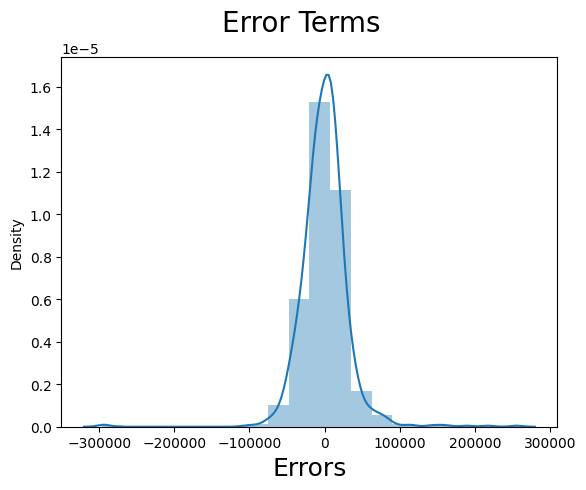

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [96]:
#evaluate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.83

In [97]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1069392015308.2422
1047396684.9248209
32363.50853855034


In [98]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

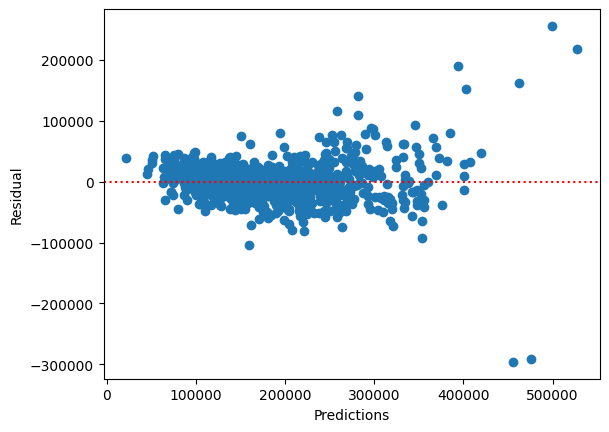

In [99]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [100]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,Fa

In [101]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,-0.032377,-0.068902,0.025916,-0.033111,-0.019212,-0.050044,0.026373,-0.010664,-0.016811,-0.091341,-0.030499,-0.012195,0.038505,0.042261,-0.105435,0.001920,0.027773,0.075129,0.049396,0.003095,-0.020822,0.015445,0.042849,-0.018849,-0.067836,-0.054609,0.066047,0.058699,-0.030043,0.039931,181645.895216,0.005526
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,0.935148,0.798998,0.949447,0.844311,0.949066,0.902588,1.009237,1.029982,0.961083,0.956973,0.966692,0.995798,1.014870,0.983782,0.846603,1.024904,1.042020,0.993950,0.973170,0.990890,1.006806,1.026307,1.023814,1.004550,0.887293,0.638820,1.280055,1.477231,0.348993,0.945506,80320.777267,0.991060
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,-0.964030,-0.293313,-1.256903,-2.314361,-2.208049,-2.098584,-0.789230,-0.124502,-2.227567,-0.837450,-0.247791,-2.840982,-0.753316,-3.484694,-4.580922,-2.293993,-2.806960,-0.927153,-0.985354,-4.106758,-2.375841,-2.225247,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-1.925187,37900.000000,-1.203301
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.688366,-0.542629,-1.181447,-0.680437,-0.789230,-0.124502,-0.747101,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.198233,-1.034916,-0.641156,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,132000.000000,-0.972515
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,-0.187498,-0.293313,-0.142124,-0.172157,-0.154845,-0.202692,-0.789230,-0.124502,-0.116915,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.238898,0.306009,-0.009406,-0.744598,-0.348159,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.105172,165000.000000,-0.049373
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,0.555693,-0.293313,0.546809,0.405345,0.871757,0.434720,0.914249,-0.124502,0.520795,1.066863,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,0.622148,1.206469,0.291653,0.306009,0.490337,0.702136,0.279079,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,213075.000000,0.577044
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,3.742487,6.306447,3.057292,3.186070,0.871757,3.408051,2.861246,11.746585,3.931322,2.971177,8.047130,2.597723,3.242196,3.836032,8.459379,2.259799,3.424626,2.171449,1.754425,0.309238,1.646935,3.658517,5.106640,7.556556,4.668571,7.459033,9.126179,21.324526,4.240389,2.078846,611657.000000,3.247562


In [102]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [103]:
#trained model columns
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'HouseAge', 'MSSubClass_50', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'GarageFinish_NA'], dtype='object')

In [108]:
import statsmodels.api as sm

# Adding a constant variable to X_test
X_test_with_const = sm.add_constant(X_test)

# Selecting columns from X_test_with_const using the columns from X_train_new
X_test_new = X_test_with_const[X_train_new.columns]


In [111]:
# Running the Linear Model after data preprocessing
# Convert data types to float
y_test = y_test.astype(float)
X_test_new = X_test_new.astype(float)

# Drop rows with missing values if needed
y_test = y_test.dropna()
X_test_new = X_test_new.dropna()

# Running the Linear Model
test_lm = sm.OLS(y_test, X_test_new).fit()

# Print summary of the model
print(test_lm.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     101.5
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          7.03e-157
Time:                        20:37:53   Log-Likelihood:                -5157.0
No. Observations:                 439   AIC:                         1.036e+04
Df Residuals:                     414   BIC:                         1.047e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.786e+05 

In [112]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Calculate r2 score of Test model

In [113]:
#evaluate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.83

In [114]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

484081639180.5764
1102691661.0035908
33206.80142687023


In [115]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [117]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.53
19,HouseStyle_1Story,3.80
4,2ndFlrSF,3.59
11,MSZoning_RL,3.39
12,MSZoning_RM,3.33
1,OverallQual,3.06
5,GarageCars,2.77
6,HouseAge,2.74
3,1stFlrSF,2.27
26,GarageFinish_NA,1.73


Text(0, 0.5, 'y_pred')

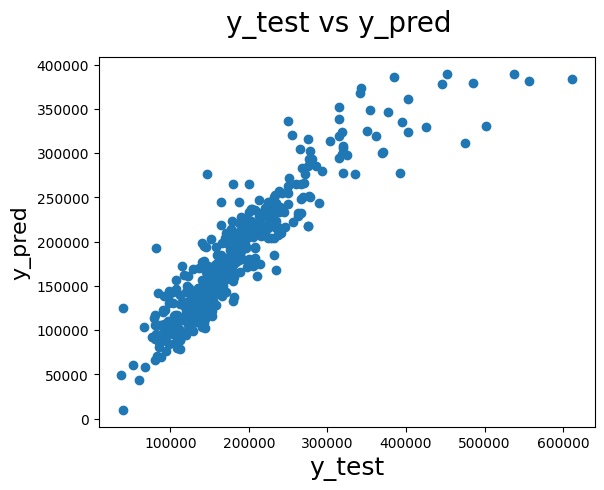

In [118]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)      

In [119]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'HouseAge', 'MSSubClass_50', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'GarageFinish_NA'], dtype='object')

In [121]:
#final dataframe 
final_df = house[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,6,284,1262,1262,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
2,7,434,920,920,866,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7,540,756,961,756,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
4,8,490,1145,1145,1053,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True


### Final evalution
- No of Variables = `21` i.e. `OverallQual`,`BsmtUnfSF`, `TotalBsmtSF`,`1stFlrSF`, `2ndFlrSF`, `MSSubClass_90`, `MSSubClass_160`, `MSZoning_RL`, `LotShape_IR3`, `LotConfig_CulDSac`, `Neighborhood_Crawfor` , `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `Neighborhood_Somerst`, `Neighborhood_StoneBr`, `Neighborhood_Veenker`, `Exterior1st_ImStucc`, `Exterior1st_Stucco`, `Exterior2nd_CmentBd` , `Exterior2nd_ImStucc`, `Exterior2nd_VinylSd`
- VIF < `5`
- p-value < `0.05`
- r2 score for Train Data set model = `0.80`
- r2 score for Test Data set model = `0.82`

### Ridge Regression

In [122]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [123]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 9.0}


In [124]:
#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[     0.          25436.17893755  11429.59020989  22196.08759516
  26308.6744358   10523.2280542   -9285.52710885   8628.82185471
 -24199.07610744 -17699.17904337 -18339.90944083  -2594.1420341
  -9548.69218378 -14316.21529895  11336.38546135  24773.90023615
  40828.51442384  37124.20858634  15181.23365266  20728.59813542
  -7019.94308739  -3322.40797089 -11117.04054426  17558.55437849
   9687.13336282   9345.69533938  12345.91697431]


In [138]:
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

# Adding a constant column to X_test_new
X_test_new = sm.add_constant(X_test_new)


# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8276122620925155
0.822520671520677
1100153806240.911
501507800348.2714
1077525765.1722927
1142386788.9482265


# Lasso


In [139]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [140]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [141]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [142]:
lasso.coef_

array([     0.        ,  24514.38341798,  11567.50060946,  21826.15745604,
        26509.68179388,   9997.87237402,  -9865.40458884,   8235.56066201,
       -27235.2913221 , -21161.51718171, -20493.28175172,  -2971.44457959,
        -8267.80076718, -16737.74054685,  12648.69164251,  30591.39518995,
        50987.3674243 ,  44491.77155072,  22463.65245269,  21713.34248827,
           -0.        ,     -0.        , -10026.19106711,  22516.98354658,
         8934.56039237,   5919.45054434,  11653.6186788 ])

In [143]:
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

# Adding a constant column to X_test_new
X_test_new = sm.add_constant(X_test_new)


# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8297305598272935
0.8254565685968908
1086635134066.4539
493211762171.0003
1064285146.0004445
1123489207.678816


In [146]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

NameError: name 'metric' is not defined

## Observe the changes in the coefficients after regularization

In [147]:
betas = pd.DataFrame(index=X.columns)

In [148]:
betas.rows = X.columns

In [149]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [150]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
const,172656.086432,0.000000,0.000000
OverallQual,23494.691452,25436.178938,24514.383418
BsmtExposure,11398.220792,11429.590210,11567.500609
1stFlrSF,21366.740658,22196.087595,21826.157456
2ndFlrSF,26941.604247,26308.674436,26509.681794
GarageCars,10675.379724,10523.228054,9997.872374
HouseAge,-10617.471903,-9285.527109,-9865.404589
MSSubClass_50,10247.350115,8628.821855,8235.560662
MSSubClass_90,-31253.707647,-24199.076107,-27235.291322
MSSubClass_120,-27122.556508,-17699.179043,-21161.517182
